# Import des librairies

In [1]:
%%time
import time
init_time = time.time()

import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


import numpy as np
import pandas as pd
import sklearn
import pickle


from matplotlib import pyplot as plt

import seaborn as sns

import string
import re

# Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text


print("Python version:", sys.version)
print("Version info.:", sys.version_info)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("skearn version:", sklearn.__version__)
print("re version:", re.__version__)
#print("nltk version:", nltk.__version__)
print("tensorflow version:", tf.__version__)
print("tensorflow_hub version:", hub.__version__)
print("tensorflow_text version:", text.__version__)

Python version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Version info.: sys.version_info(major=3, minor=11, micro=12, releaselevel='final', serial=0)
pandas version: 2.2.2
numpy version: 1.26.4
skearn version: 1.6.1
re version: 2.2.1
tensorflow version: 2.18.0
tensorflow_hub version: 0.16.1
tensorflow_text version: 2.18.1
CPU times: user 4.06 s, sys: 1.53 s, total: 5.59 s
Wall time: 9.94 s


# Chargement des données

In [2]:
path = "/content/drive/MyDrive/data/sentiments"
#path = "./data/sentiments"

In [3]:
tweets_df_count_vectorizer_1gram = np.load(os.path.join(path, "tweets_df_em_1gram.npy"), allow_pickle=True)
tweets_df_count_vectorizer_1gram

array(<1593071x695610 sparse matrix of type '<class 'numpy.int64'>'
	with 11079999 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [4]:
tweets_df_count_vectorizer_1gram.item()[10].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [8]:
targets = np.load(os.path.join(path, "targets.npy"), allow_pickle=True)
targets

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
%%time
tweets_df_count_vectorizer_1gram = np.load(os.path.join(path, "tweets_df_em_1gram.npy"), allow_pickle=True)
tweets_df_count_vectorizer_2gram = np.load(os.path.join(path, "tweets_df_em_2gram.npy"), allow_pickle=True)

tweets_df_tfidf_1gram = np.load(os.path.join(path, "tweets_df_tfidf_1gram.npy"), allow_pickle=True)

tweets_embeddings_bert = np.load(os.path.join(path, "embeddings_bert.npy"), allow_pickle=True)
tweets_embeddings_fasttext = pickle.load(open(os.path.join(path, "embeddings_fasttext.pkl"), "rb"))
tweets_embeddings_word2vec = pickle.load(open(os.path.join(path, "embeddings_word2vec.pkl"), "rb"))

CPU times: user 8.07 s, sys: 10.2 s, total: 18.2 s
Wall time: 23.9 s


In [6]:
print(tweets_df_count_vectorizer_1gram.item().shape)
print(tweets_df_count_vectorizer_2gram.item().shape)
print(tweets_df_tfidf_1gram.item().shape)
print(tweets_embeddings_bert.shape)

(1593071, 695610)
(1593071, 695643)
(1593071, 695610)
(10000, 768)


In [21]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Matrice d'entrée (CSR sparse matrix)
X = tweets_df_count_vectorizer_1gram.item()  # ou .item() si stocké dans np.array

# Variable cible
y = targets  # adapte le nom ici

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Répartition dans y      :", pd.Series(y).value_counts(normalize=True))
print("Répartition dans y_train:", pd.Series(y_train).value_counts(normalize=True))
print("Répartition dans y_test :", pd.Series(y_test).value_counts(normalize=True))

Répartition dans y      : 1    0.500037
0    0.499963
Name: proportion, dtype: float64
Répartition dans y_train: 1    0.500038
0    0.499962
Name: proportion, dtype: float64
Répartition dans y_test : 1    0.500036
0    0.499964
Name: proportion, dtype: float64
CPU times: user 428 ms, sys: 32.1 ms, total: 460 ms
Wall time: 477 ms


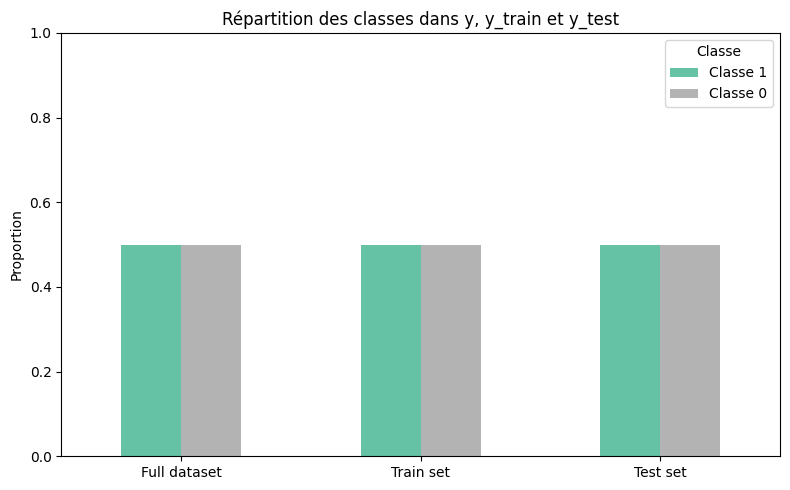

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Création des distributions
dist_df = pd.DataFrame({
    "Full dataset": pd.Series(y).value_counts(normalize=True),
    "Train set": pd.Series(y_train).value_counts(normalize=True),
    "Test set": pd.Series(y_test).value_counts(normalize=True)
}).T

# Optionnel : renommer les colonnes
dist_df.columns = ["Classe 1", "Classe 0"]

# Barplot
dist_df.plot(kind="bar", figsize=(8, 5), colormap="Set2")
plt.title("Répartition des classes dans y, y_train et y_test")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title="Classe")
plt.tight_layout()
plt.show()

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE :", mean_squared_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))

MSE : 0.21332754508650964
R² : 0.14668981520734004


In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _= roc_curve(y_test, y_pred)

In [26]:
roc_auc_score(y_test, y_pred)

0.801536673276564

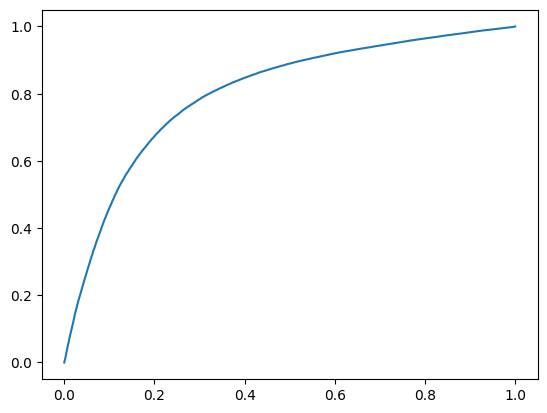

In [27]:
plt.plot(fpr, tpr)